In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def aproximacao_polinomial_mq(pontos, grau: int):
    """
    Ajuste polinomial por minimos quadrados usando apenas NumPy

    Parâmetros
        pontos
            Array 2 x k com dados de entrada
            Linha 0 contém x
            Linha 1 contém y
            Pode ser lista de listas ou np.ndarray
    grau
        Grau do polinomio esperado
        Inteiro maior ou igual a zero

    Retorna
        np.ndarray de forma (grau + 1,)
        Coeficientes do polinomio em ordem decrescente [a_n ... a_1 a_0]

    Exceções
        ValueError se pontos nao tiver duas linhas ou se os comprimentos de x e y forem diferentes
        ValueError se grau for negativo

    Detalhes do método
        Constrói a matriz de Vandermonde com np.vander com increasing=False
        Resolve o sistema por minimos quadrados via np.linalg.lstsq 


    """
    x = np.asarray(pontos[0], dtype=float)
    y = np.asarray(pontos[1], dtype=float)
    if x.size != y.size:
        raise ValueError("pontos deve ter duas linhas com o mesmo numero de colunas")
    if grau < 0:
        raise ValueError("grau deve ser inteiro nao negativo")

    X = np.vander(x, N=grau + 1, increasing=False)

    alpha_desc = np.linalg.lstsq(X, y, rcond=None)[0]

    return alpha_desc


def plotar_aprox_pol_mq(pontos, grau: int):
    """
    Gera o grafico do ajuste polinomial por minimos quadrados e retorna os coeficientes

    Parâmetros
        pontos
            Array 2 x k com x e y conforme descrito em aproximacao_polinomial_mq
        grau
            Grau do polinomio
    Retorna
        np.ndarray com coeficientes em ordem decrescente [a_n ... a_1 a_0]

    Eixos e estilo
        Dispersao dos dados em pontos
        Curva do polinomio ajustado em linha continua

    """
    polinomio = aproximacao_polinomial_mq(pontos, grau)
    x = np.asarray(pontos[0], dtype=float).ravel()
    y = np.asarray(pontos[1], dtype=float).ravel()

    n_grid = max(100, int(round(max(x) - min(x)) * 100))
    x_pred = np.linspace(min(x), max(x), n_grid)
    y_pred = np.polyval(polinomio, x_pred)

    plt.scatter(x, y, label="dados", s=30)
    plt.plot(x_pred, y_pred, label="polinomio", linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    return polinomio


def aproximacao_polinomial_aleatoria(pontos, grau: int, expoente=3, intervalo=(0.0, 1.0), seed=None):
    """
    Busca aleatoria de coeficientes polinomiais para aproximar os dados
    Util para comparacao visual e para estudos de heuristicas
    Nao garante otimo global

    Parâmetros
        pontos
            Array 2 x k com x e y
        grau
            Grau do polinomio
        expoente
            Controla o numero de tentativas como 10 elevado a expoente
            Valores maiores aumentam custo e tendem a melhorar a aproximacao
        intervalo
            Par de limites inferior e superior do sorteio uniforme dos coeficientes
        seed
            Valor inteiro opcional para reprodutibilidade via np.random.default_rng

    Retorna
        np.ndarray com coeficientes em ordem decrescente [a_n ... a_1 a_0]

    Métrica de erro
        Norma Euclidiana de y menos y_pred onde y_pred é avaliado com numpy.polyval
    """
    x = np.asarray(pontos[0], dtype=float).ravel()
    y = np.asarray(pontos[1], dtype=float).ravel()

    tentativas = 10**expoente
    low, high = float(intervalo[0]), float(intervalo[1])

    rng = np.random.default_rng(seed)

    melhor_erro = None
    melhor_alpha = None
    n_coef = grau + 1

    for _ in range(tentativas):
        alpha = rng.uniform(low, high, size=n_coef)
        y_pred = np.polyval(alpha, x)
        erro = np.linalg.norm(y - y_pred)

        if melhor_erro is None or erro < melhor_erro:
            melhor_erro = erro
            melhor_alpha = alpha.copy()

    return melhor_alpha


def plotar_aprox_pol_ale(pontos, grau: int, expoente=3, intervalo=(-1.0, 1.0), seed=None):
    """
    Gera o grafico da aproximacao obtida por busca aleatoria e retorna os coeficientes

    Parâmetros
        pontos
            Array 2 x k com x e y
        grau
            Grau do polinomio
        expoente
            Define 10 elevado a expoente como numero de tentativas
        intervalo
            Limites do sorteio uniforme dos coeficientes
        seed
            Semente do gerador de numeros aleatorios

    Retorna
        np.ndarray com coeficientes em ordem decrescente [a_n ... a_1 a_0]

    Observacao
        Ideal para comparar de forma visual com o ajuste por minimos quadrados

    """
    polinomio = aproximacao_polinomial_aleatoria(pontos, grau, expoente, intervalo, seed)
    x = np.asarray(pontos[0], dtype=float).ravel()
    y = np.asarray(pontos[1], dtype=float).ravel()

    n_grid = max(100, int(round(max(x) - min(x)) * 100))
    x_pred = np.linspace(min(x), max(x), n_grid)
    y_pred = np.polyval(polinomio, x_pred)

    plt.scatter(x, y, label="dados", s=30)
    plt.plot(x_pred, y_pred, label="polinomio", linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    return polinomio


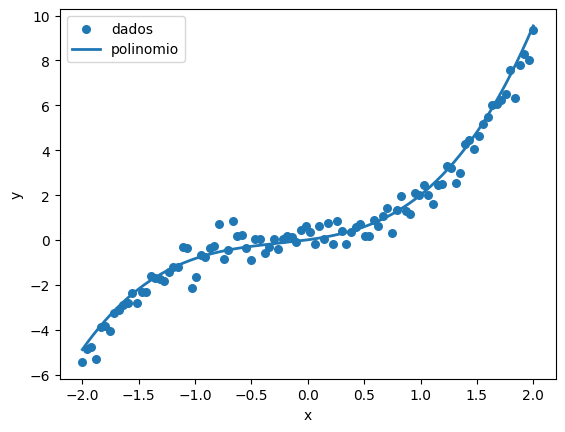

Coeficientes aleatorios [a_n ... a_0]: [0.72889135 0.57973706 0.68854938 0.01280833]


In [31]:
import numpy as np

rng = np.random.default_rng(1)
x = np.linspace(-2.0, 2.0, 100)
y = 0.8*x**3 + 0.4*x**2 + 0.5*x + 0.2 + rng.normal(0.0, 0.5, size=x.size)
pontos = np.vstack([x, y])

coef = plotar_aprox_pol_ale(pontos, grau=3, expoente=4, intervalo=(-2.0, 2.0), seed=42)
print("Coeficientes aleatorios [a_n ... a_0]:", coef)


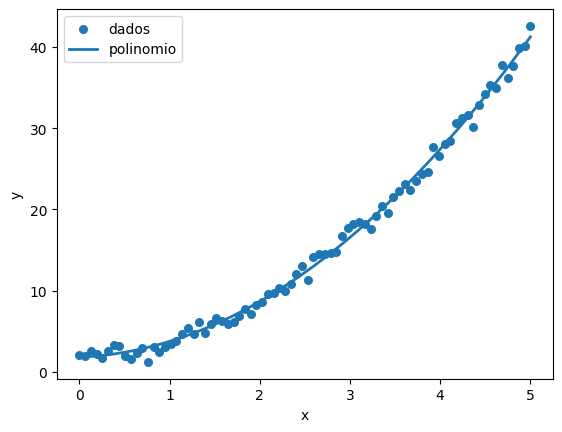

Coeficientes MQ [a_n ... a_0]: [1.48546299 0.45846125 1.82202901]


In [32]:
import numpy as np

rng = np.random.default_rng(0)
x = np.linspace(0.0, 5.0, 80)
y = 1.5*x**2 + 0.3*x + 2.0 + rng.normal(0.0, 0.8, size=x.size)
pontos = np.vstack([x, y])

coef = plotar_aprox_pol_mq(pontos, grau=2)
print("Coeficientes MQ [a_n ... a_0]:", coef)


Tentativas aleatorias = 100,000
Tempo MQ = 0.000 s
Tempo Aleatorio = 1.893 s
RMSE MQ = 0.0000
RMSE Aleatoria = 11568.3466


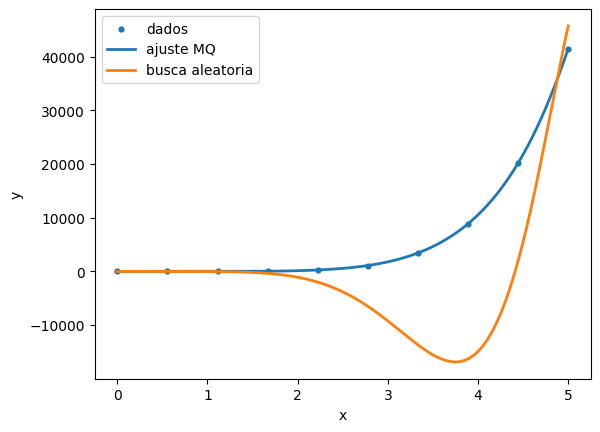

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

rng = np.random.default_rng(11)
x = np.linspace(0.0001, 5.0, 10)
y_true = 3.0*x**6 - 1.8*x**5 + 0.5*x**4 - 0.3*x**3 + 0.2*x**2 + 2.0*x + 1.0 - (np.log(x))
y = y_true + rng.normal(0.0, 12.0, size=x.size)
pontos = np.vstack([x, y])

grau = 10

# ajuste por minimos quadrados
t0 = time.perf_counter()
coef_mq = aproximacao_polinomial_mq(pontos, grau)
t1 = time.perf_counter()

# busca aleatoria com muitas tentativas e intervalo muito amplo
expoente = 5                      # 10**5 tentativas
intervalo = (-10, 10)           # espaco de busca grande
t2 = time.perf_counter()
coef_ale = aproximacao_polinomial_aleatoria(pontos, grau, expoente=expoente, intervalo=intervalo, seed=123)
t3 = time.perf_counter()

# avaliacao
x_pred = np.linspace(x.min(), x.max(), 800)
y_mq = np.polyval(coef_mq, x_pred)
y_ale = np.polyval(coef_ale, x_pred)

rmse_mq = np.sqrt(np.mean((np.polyval(coef_mq, x) - y)**2))
rmse_ale = np.sqrt(np.mean((np.polyval(coef_ale, x) - y)**2))

print(f"Tentativas aleatorias = {10**expoente:,}")
print(f"Tempo MQ = {t1 - t0:.3f} s")
print(f"Tempo Aleatorio = {t3 - t2:.3f} s")
print(f"RMSE MQ = {rmse_mq:.4f}")
print(f"RMSE Aleatoria = {rmse_ale:.4f}")

plt.scatter(x, y, s=12, label="dados")
plt.plot(x_pred, y_mq, linewidth=2, label="ajuste MQ")
plt.plot(x_pred, y_ale, linewidth=2, label="busca aleatoria")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
